matrix transformation only for perfect file (with path 0)

In [98]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize

# pymatgen libraries
from pymatgen.core.structure import Structure

# import function from .py file
from get_weirdos_ver3_new_cleaned import get_dx_dz_init_litype3, get_sum_weirdos_Li_var_wo_weirdo_litype3
# from get_weirdos import get_sum_weirdos_Li
# from modify_dx_dz import create_file_name, change_dx_dz
# from get_weirdos import get_dx1_dx2_dz_init, get_sum_weirdos_Li

direc = os.getcwd() # get current working directory

In [99]:
# from get_weirdos_ver3_new_cleaned import varying_radius_vs_sumweirdosLi, plot_varying_radius_vs_sumweirdosLi

In [100]:
# # filefile_path_ori_ref_48n24 = "./perfect_poscar/cif_matrix/ori/Li6PS5Cl_type2.cif"_path_ori_ref_48n24 = "./perfect_poscar/cif_matrix/ori/Li6PS5Cl_48n24_mod_old_2p27291_0p88814_arcA.cif"  # Replace with your file path
  # Replace with your file path
file_perfect_poscar_48n24_wo_cif = "Li6PS5Cl_optitype1n2_strictr_a_type3_B_zoomedin" # same as: "Li6PS5Cl_type2_2iia_115_new"
file_perfect_poscar_48n24 = f"{file_perfect_poscar_48n24_wo_cif}.cif"

file_path_ori_ref_48n24 = f"./perfect_poscar/cif_matrix/ori/{file_perfect_poscar_48n24}"
file_perfect_poscar_24 = "Li6PS5Cl_24_mod_2p27291.cif"
# file_ori_ref_48n24 = "Li6PS5Cl_48n24_mod_old_2p27291_0p88814_arcA.cif"

n_file_start = 0
n_file_end = 54

activate_radius = 1
max_mapping_radius = 0.043 # 0.043 ### 0.018 # 0.015 # 0.043
max_mapping_radius_48htype2 = 0.066 # 0.076 ### 0.075 # 0.051 # 0.076
max_mapping_radius_48htype1_48htype2 = (max_mapping_radius + max_mapping_radius_48htype2) / 2

In [101]:
if activate_radius == 1:
    file_loc_important_cols = pd.read_pickle(f'file_loc_important_cols_{max_mapping_radius}_{file_perfect_poscar_48n24_wo_cif}.pkl') 
elif activate_radius == 2:
    file_loc_important_cols = pd.read_pickle(f'file_loc_important_cols_{max_mapping_radius}_{max_mapping_radius_48htype2}_{file_perfect_poscar_48n24_wo_cif}.pkl')
elif activate_radius == 3:
    file_loc_important_cols = pd.read_pickle(f'file_loc_important_cols_{max_mapping_radius}_{max_mapping_radius_48htype2}_{max_mapping_radius_48htype1_48htype2}_{file_perfect_poscar_48n24_wo_cif}.pkl')

df_wo_weirdos_selectedcol = file_loc_important_cols[['geometry','path','subdir_new_system', 'toten [eV]']].sort_values("toten [eV]", ascending=True)[n_file_start:n_file_end].reset_index().copy()

In [102]:
dx1_48h_type1_init, dx2_48h_type1_init, dz_48h_type1_init, dx1_48h_type2_init, dx2_48h_type2_init, dz_48h_type2_init, dx_24g_init, dz1_24g_init, dz2_24g_init, dx1_48h_type3_init, dx2_48h_type3_init, dz_48h_type3_init = get_dx_dz_init_litype3(file_path_ori_ref_48n24)

dx1_48h_type1, dx2_48h_type1, dz_48h_type1 = dx1_48h_type1_init, dx2_48h_type1_init, dz_48h_type1_init
dx1_48h_type2, dx2_48h_type2, dz_48h_type2 = dx1_48h_type2_init, dx2_48h_type2_init, dz_48h_type2_init
dx_24g, dz1_24g, dz2_24g = dx_24g_init, dz1_24g_init, dz2_24g_init
dx1_48h_type3, dx2_48h_type3, dz_48h_type3 = dx1_48h_type3_init, dx2_48h_type3_init, dz_48h_type3_init

litype = 3
var_excel_file = "litype3"
max_mapping_radius_init = max_mapping_radius
max_mapping_radius_48htype2_init = max_mapping_radius_48htype2

# idea: outer loop dz2 positive, then dz1 ositive and negative
# 2nd loop: dz2 negative

In [103]:
# delta_coor = 0.02

# min_coor_dx2 = dx2_48h_type3 - 0.38 - delta_coor
# max_coor_dx2 = dx2_48h_type3 + 0.38 + delta_coor

# min_coor_dz = dz_48h_type3 - 0.38 - delta_coor
# max_coor_dz = dz_48h_type3 + 0.38 + delta_coor

delta_coor = 0.001

min_coor_dx2 = dx2_48h_type3 - 0.003 - delta_coor
max_coor_dx2 = dx2_48h_type3 + 0.003 + delta_coor

min_coor_dz = dz_48h_type3 - 0.003 - delta_coor
max_coor_dz = dz_48h_type3 + 0.003 + delta_coor

var_optitype = "varying_dx_dz"

In [104]:
forward_dx1_init = dx1_48h_type3
forward_dx2_init = dx2_48h_type3
forward_dz_init = dz_48h_type3

backward_dx1 = dx1_48h_type3
backward_dx2 = dx2_48h_type3
backward_dz = dz_48h_type3

forward_dx1_negative = dx1_48h_type3 * -1
forward_dx2_negative = dx2_48h_type3 * -1
forward_dz_negative = dz_48h_type3 * -1

backward_dx1_negative = dx1_48h_type3 * -1
backward_dx2_negative = dx2_48h_type3 * -1
backward_dz_negative = dz_48h_type3 * -1

In [105]:
col_dx1 = "dx1"
col_dx2 = "dx2"
col_dz = "dz"
col_sumweirdosLi = "sumweirdosLi"

dx_dz_sumweirdosLi_df = pd.DataFrame()
dx_dz_sumweirdosLi_df[col_dx1] = None
dx_dz_sumweirdosLi_df[col_dx2] = None
dx_dz_sumweirdosLi_df[col_dz] = None
dx_dz_sumweirdosLi_df[col_sumweirdosLi] = None

global idx_sumweirdosLi_df
idx_sumweirdosLi_df = 0


## all forward
forward_dx2 = dx2_48h_type3

while forward_dx2 <= max_coor_dx2:
    
    forward_dx1 = dx1_48h_type3
    forward_dz = dz_48h_type3
    
    while forward_dz <= max_coor_dz:
        sum_weirdos_Li = get_sum_weirdos_Li_var_wo_weirdo_litype3(forward_dx1, forward_dx2, forward_dz, max_mapping_radius, max_mapping_radius_48htype2, df_wo_weirdos_selectedcol, activate_radius, file_perfect_poscar_24, file_perfect_poscar_48n24, litype, var_optitype)
    
        print(f"dx1: {forward_dx1}, dx2: {forward_dx2}, dz: {forward_dz}, idx: {idx_sumweirdosLi_df}")

        dx_dz_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_dx1] = forward_dx1
        dx_dz_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_dx2] = forward_dx2
        dx_dz_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_dz] = forward_dz
        dx_dz_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_sumweirdosLi] = sum_weirdos_Li

        forward_dz += delta_coor
        forward_dx1 -= delta_coor

        idx_sumweirdosLi_df += 1

    forward_dx2 += delta_coor


## inner loop backward
forward_dx2 = dx2_48h_type3

while forward_dx2 <= max_coor_dx2:
    
    forward_dx1 = dx1_48h_type3
    forward_dz = dz_48h_type3
    
    while forward_dz >= min_coor_dz:
        sum_weirdos_Li = get_sum_weirdos_Li_var_wo_weirdo_litype3(forward_dx1, forward_dx2, forward_dz, max_mapping_radius, max_mapping_radius_48htype2, df_wo_weirdos_selectedcol, activate_radius, file_perfect_poscar_24, file_perfect_poscar_48n24, litype, var_optitype)
    
        print(f"dx1: {forward_dx1}, dx2: {forward_dx2}, dz: {forward_dz}, idx: {idx_sumweirdosLi_df}")

        dx_dz_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_dx1] = forward_dx1
        dx_dz_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_dx2] = forward_dx2
        dx_dz_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_dz] = forward_dz
        dx_dz_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_sumweirdosLi] = sum_weirdos_Li

        forward_dz -= delta_coor
        forward_dx1 += delta_coor

        idx_sumweirdosLi_df += 1

    forward_dx2 += delta_coor


## all backward
forward_dx2 = dx2_48h_type3

while forward_dx2 >= min_coor_dx2:
    
    forward_dx1 = dx1_48h_type3
    forward_dz = dz_48h_type3
    
    while forward_dz >= min_coor_dz:
        sum_weirdos_Li = get_sum_weirdos_Li_var_wo_weirdo_litype3(forward_dx1, forward_dx2, forward_dz, max_mapping_radius, max_mapping_radius_48htype2, df_wo_weirdos_selectedcol, activate_radius, file_perfect_poscar_24, file_perfect_poscar_48n24, litype, var_optitype)
    
        print(f"dx1: {forward_dx1}, dx2: {forward_dx2}, dz: {forward_dz}, idx: {idx_sumweirdosLi_df}")

        dx_dz_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_dx1] = forward_dx1
        dx_dz_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_dx2] = forward_dx2
        dx_dz_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_dz] = forward_dz
        dx_dz_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_sumweirdosLi] = sum_weirdos_Li

        forward_dz -= delta_coor
        forward_dx1 += delta_coor

        idx_sumweirdosLi_df += 1

    forward_dx2 -= delta_coor


## outer backward
forward_dx2 = dx2_48h_type3

while forward_dx2 >= min_coor_dx2:
    
    forward_dx1 = dx1_48h_type3
    forward_dz = dz_48h_type3
    
    while forward_dz <= max_coor_dz:
        sum_weirdos_Li = get_sum_weirdos_Li_var_wo_weirdo_litype3(forward_dx1, forward_dx2, forward_dz, max_mapping_radius, max_mapping_radius_48htype2, df_wo_weirdos_selectedcol, activate_radius, file_perfect_poscar_24, file_perfect_poscar_48n24, litype, var_optitype)
    
        print(f"dx1: {forward_dx1}, dx2: {forward_dx2}, dz: {forward_dz}, idx: {idx_sumweirdosLi_df}")

        dx_dz_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_dx1] = forward_dx1
        dx_dz_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_dx2] = forward_dx2
        dx_dz_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_dz] = forward_dz
        dx_dz_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_sumweirdosLi] = sum_weirdos_Li

        forward_dz += delta_coor
        forward_dx1 -= delta_coor

        idx_sumweirdosLi_df += 1

    forward_dx2 -= delta_coor

/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3371800000000001, dx2: 0.03253, dz: 0.6628199999999999, idx: 0


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3361800000000001, dx2: 0.03253, dz: 0.6638199999999999, idx: 1


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3351800000000001, dx2: 0.03253, dz: 0.6648199999999999, idx: 2


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3341800000000001, dx2: 0.03253, dz: 0.6658199999999999, idx: 3


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3331800000000001, dx2: 0.03253, dz: 0.6668199999999999, idx: 4


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3371800000000001, dx2: 0.033530000000000004, dz: 0.6628199999999999, idx: 5


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3361800000000001, dx2: 0.033530000000000004, dz: 0.6638199999999999, idx: 6


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3351800000000001, dx2: 0.033530000000000004, dz: 0.6648199999999999, idx: 7


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3341800000000001, dx2: 0.033530000000000004, dz: 0.6658199999999999, idx: 8


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3331800000000001, dx2: 0.033530000000000004, dz: 0.6668199999999999, idx: 9


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3371800000000001, dx2: 0.034530000000000005, dz: 0.6628199999999999, idx: 10


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3361800000000001, dx2: 0.034530000000000005, dz: 0.6638199999999999, idx: 11


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3351800000000001, dx2: 0.034530000000000005, dz: 0.6648199999999999, idx: 12


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3341800000000001, dx2: 0.034530000000000005, dz: 0.6658199999999999, idx: 13


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3331800000000001, dx2: 0.034530000000000005, dz: 0.6668199999999999, idx: 14


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3371800000000001, dx2: 0.035530000000000006, dz: 0.6628199999999999, idx: 15


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3361800000000001, dx2: 0.035530000000000006, dz: 0.6638199999999999, idx: 16


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3351800000000001, dx2: 0.035530000000000006, dz: 0.6648199999999999, idx: 17


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3341800000000001, dx2: 0.035530000000000006, dz: 0.6658199999999999, idx: 18


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3331800000000001, dx2: 0.035530000000000006, dz: 0.6668199999999999, idx: 19


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3371800000000001, dx2: 0.03653000000000001, dz: 0.6628199999999999, idx: 20


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3361800000000001, dx2: 0.03653000000000001, dz: 0.6638199999999999, idx: 21


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3351800000000001, dx2: 0.03653000000000001, dz: 0.6648199999999999, idx: 22


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3341800000000001, dx2: 0.03653000000000001, dz: 0.6658199999999999, idx: 23


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3331800000000001, dx2: 0.03653000000000001, dz: 0.6668199999999999, idx: 24


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3371800000000001, dx2: 0.03253, dz: 0.6628199999999999, idx: 25


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3381800000000001, dx2: 0.03253, dz: 0.6618199999999999, idx: 26


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3391800000000001, dx2: 0.03253, dz: 0.6608199999999999, idx: 27


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3401800000000001, dx2: 0.03253, dz: 0.6598199999999999, idx: 28


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3411800000000001, dx2: 0.03253, dz: 0.6588199999999999, idx: 29


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3371800000000001, dx2: 0.033530000000000004, dz: 0.6628199999999999, idx: 30


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3381800000000001, dx2: 0.033530000000000004, dz: 0.6618199999999999, idx: 31


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3391800000000001, dx2: 0.033530000000000004, dz: 0.6608199999999999, idx: 32


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3401800000000001, dx2: 0.033530000000000004, dz: 0.6598199999999999, idx: 33


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3411800000000001, dx2: 0.033530000000000004, dz: 0.6588199999999999, idx: 34


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3371800000000001, dx2: 0.034530000000000005, dz: 0.6628199999999999, idx: 35


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3381800000000001, dx2: 0.034530000000000005, dz: 0.6618199999999999, idx: 36


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3391800000000001, dx2: 0.034530000000000005, dz: 0.6608199999999999, idx: 37


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3401800000000001, dx2: 0.034530000000000005, dz: 0.6598199999999999, idx: 38


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3411800000000001, dx2: 0.034530000000000005, dz: 0.6588199999999999, idx: 39


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3371800000000001, dx2: 0.035530000000000006, dz: 0.6628199999999999, idx: 40


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3381800000000001, dx2: 0.035530000000000006, dz: 0.6618199999999999, idx: 41


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3391800000000001, dx2: 0.035530000000000006, dz: 0.6608199999999999, idx: 42


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3401800000000001, dx2: 0.035530000000000006, dz: 0.6598199999999999, idx: 43


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3411800000000001, dx2: 0.035530000000000006, dz: 0.6588199999999999, idx: 44


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3371800000000001, dx2: 0.03653000000000001, dz: 0.6628199999999999, idx: 45


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3381800000000001, dx2: 0.03653000000000001, dz: 0.6618199999999999, idx: 46


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3391800000000001, dx2: 0.03653000000000001, dz: 0.6608199999999999, idx: 47


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3401800000000001, dx2: 0.03653000000000001, dz: 0.6598199999999999, idx: 48


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3411800000000001, dx2: 0.03653000000000001, dz: 0.6588199999999999, idx: 49


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3371800000000001, dx2: 0.03253, dz: 0.6628199999999999, idx: 50


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3381800000000001, dx2: 0.03253, dz: 0.6618199999999999, idx: 51


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3391800000000001, dx2: 0.03253, dz: 0.6608199999999999, idx: 52


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3401800000000001, dx2: 0.03253, dz: 0.6598199999999999, idx: 53


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3411800000000001, dx2: 0.03253, dz: 0.6588199999999999, idx: 54


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3371800000000001, dx2: 0.03153, dz: 0.6628199999999999, idx: 55


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3381800000000001, dx2: 0.03153, dz: 0.6618199999999999, idx: 56


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3391800000000001, dx2: 0.03153, dz: 0.6608199999999999, idx: 57


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3401800000000001, dx2: 0.03153, dz: 0.6598199999999999, idx: 58


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3411800000000001, dx2: 0.03153, dz: 0.6588199999999999, idx: 59


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3371800000000001, dx2: 0.03053, dz: 0.6628199999999999, idx: 60


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3381800000000001, dx2: 0.03053, dz: 0.6618199999999999, idx: 61


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3391800000000001, dx2: 0.03053, dz: 0.6608199999999999, idx: 62


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3401800000000001, dx2: 0.03053, dz: 0.6598199999999999, idx: 63


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3411800000000001, dx2: 0.03053, dz: 0.6588199999999999, idx: 64


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3371800000000001, dx2: 0.02953, dz: 0.6628199999999999, idx: 65


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3381800000000001, dx2: 0.02953, dz: 0.6618199999999999, idx: 66


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3391800000000001, dx2: 0.02953, dz: 0.6608199999999999, idx: 67


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3401800000000001, dx2: 0.02953, dz: 0.6598199999999999, idx: 68


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3411800000000001, dx2: 0.02953, dz: 0.6588199999999999, idx: 69


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3371800000000001, dx2: 0.03253, dz: 0.6628199999999999, idx: 70


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3361800000000001, dx2: 0.03253, dz: 0.6638199999999999, idx: 71


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3351800000000001, dx2: 0.03253, dz: 0.6648199999999999, idx: 72


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3341800000000001, dx2: 0.03253, dz: 0.6658199999999999, idx: 73


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3331800000000001, dx2: 0.03253, dz: 0.6668199999999999, idx: 74


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3371800000000001, dx2: 0.03153, dz: 0.6628199999999999, idx: 75


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3361800000000001, dx2: 0.03153, dz: 0.6638199999999999, idx: 76


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3351800000000001, dx2: 0.03153, dz: 0.6648199999999999, idx: 77


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3341800000000001, dx2: 0.03153, dz: 0.6658199999999999, idx: 78


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3331800000000001, dx2: 0.03153, dz: 0.6668199999999999, idx: 79


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3371800000000001, dx2: 0.03053, dz: 0.6628199999999999, idx: 80


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3361800000000001, dx2: 0.03053, dz: 0.6638199999999999, idx: 81


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3351800000000001, dx2: 0.03053, dz: 0.6648199999999999, idx: 82


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3341800000000001, dx2: 0.03053, dz: 0.6658199999999999, idx: 83


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3331800000000001, dx2: 0.03053, dz: 0.6668199999999999, idx: 84


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3371800000000001, dx2: 0.02953, dz: 0.6628199999999999, idx: 85


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3361800000000001, dx2: 0.02953, dz: 0.6638199999999999, idx: 86


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3351800000000001, dx2: 0.02953, dz: 0.6648199999999999, idx: 87


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3341800000000001, dx2: 0.02953, dz: 0.6658199999999999, idx: 88


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:665: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

dx1: 0.3331800000000001, dx2: 0.02953, dz: 0.6668199999999999, idx: 89


In [106]:
# def process_data(forward_dx2_start, forward_dx2_end, dx2_step, forward_dz_start, forward_dz_end, dz_step, delta_coor):
#     global idx_sumweirdosLi_df

#     forward_dx2 = forward_dx2_start

#     while forward_dx2 <= forward_dx2_end:
        
#         forward_dx1 = dx1_48h_type1
#         forward_dz = forward_dz_start
        
#         while forward_dz <= forward_dz_end:
#             sum_weirdos_Li = get_sum_weirdos_Li_var_wo_weirdo(forward_dx1, forward_dx2, forward_dz, dx1_48h_type2, dx2_48h_type2, dz_48h_type2, dx_24g, dz1_24g, dz2_24g, max_mapping_radius, max_mapping_radius_48htype2, df_wo_weirdos_selectedcol, activate_radius, file_perfect_poscar_24, file_perfect_poscar_48n24, litype, var_optitype)
        
#             print(f"dx1: {forward_dx1}, dx2: {forward_dx2}, dz: {forward_dz}, idx: {idx_sumweirdosLi_df}")

#             dx_dz_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_dx1] = forward_dx1
#             dx_dz_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_dx2] = forward_dx2
#             dx_dz_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_dz] = forward_dz
#             dx_dz_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_sumweirdosLi] = sum_weirdos_Li

#             forward_dz += delta_coor
#             forward_dx1 -= delta_coor

#             idx_sumweirdosLi_df += 1

#         forward_dx2 += dx2_step


# # All forward
# process_data(dx2_48h_type1, max_coor_dx2, delta_coor, dz_48h_type1, max_coor_dz, delta_coor, delta_coor)

# # Inner loop backward
# process_data(dx2_48h_type1, max_coor_dx2, delta_coor, dz_48h_type1, min_coor_dz, -delta_coor, delta_coor)

# # All backward
# process_data(max_coor_dx2, min_coor_dx2, -delta_coor, dz_48h_type1, min_coor_dz, -delta_coor, delta_coor)

# # Outer backward
# process_data(max_coor_dx2, min_coor_dx2, -delta_coor, dz_48h_type1, max_coor_dz, delta_coor, delta_coor)


In [114]:
dx_dz_sumweirdosLi_df

,dx1,dx2,dz,sumweirdosLi
0,0.33718,0.03253,0.66282,45.0
1,0.33618,0.03253,0.66382,46.0
2,0.33518,0.03253,0.66482,46.0
3,0.33418,0.03253,0.66582,46.0
4,0.33318,0.03253,0.66682,46.0
...,...,...,...,...
85,0.33718,0.02953,0.66282,47.0
86,0.33618,0.02953,0.66382,47.0
87,0.33518,0.02953,0.66482,47.0
88,0.33418,0.02953,0.66582,46.0


In [115]:
# dx_dz_sumweirdosLi_df.plot(x="radius_type1", y="sumweirdosLi")

In [116]:
min_sumweirdos = int(dx_dz_sumweirdosLi_df["sumweirdosLi"].min())

In [117]:
dx_dz_sumweirdosLi_df_noduplicates = dx_dz_sumweirdosLi_df.drop_duplicates(subset=['dx1', 'dx2', 'dz'])

In [118]:
if activate_radius == 2:
    dx_dz_sumweirdosLi_df_noduplicates.to_excel(f'08_varying_dx_dz_{min_sumweirdos}_{max_mapping_radius}_{max_mapping_radius_48htype2}_{file_perfect_poscar_48n24_wo_cif}_{var_excel_file}_again.xlsx', index=False)
elif activate_radius == 1:
    dx_dz_sumweirdosLi_df_noduplicates.to_excel(f'08_varying_dx_dz_{min_sumweirdos}_{max_mapping_radius}_{file_perfect_poscar_48n24_wo_cif}_{var_excel_file}_again.xlsx', index=False)

<Axes: xlabel='dx2', ylabel='dx1'>

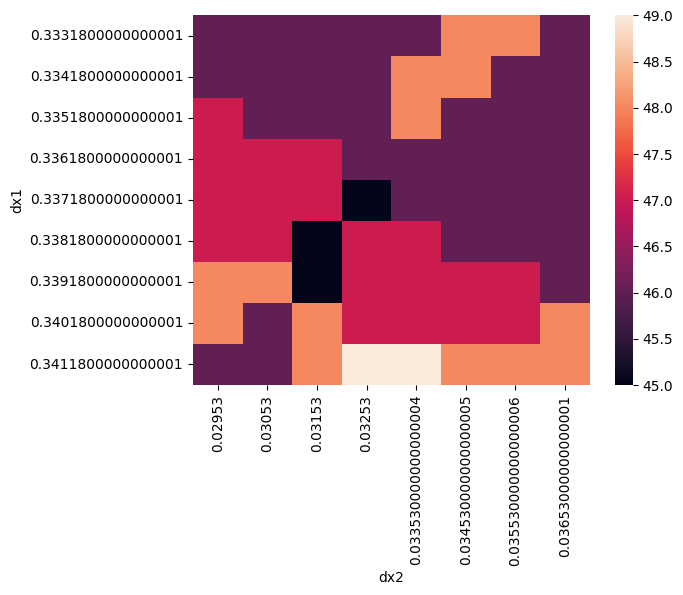

In [119]:
%matplotlib inline

# flights= sns.load_dataset('flights')

# flights.head()

matrix_map = dx_dz_sumweirdosLi_df_noduplicates.pivot_table(index='dx1', columns='dx2',values='sumweirdosLi')  

sns.heatmap(matrix_map)

In [113]:
# df = pd.read_excel('08_varying_dx_dz_31_litype2.xlsx')

# selected_rows = df[(df['dx2'] >= 0.020) & (df['dx2'] <= 0.036)]

# matrix_map = selected_rows.pivot_table(index='dx1', columns='dx2',values='sumweirdosLi')  

# sns.heatmap(matrix_map)